# Aufgabe 11 - Trading Environment Setup
22.01.2022, Thomas Iten

**Content**
0. Setup
1. Load S&P 500 Dataset
2. Create Trading Environment and visualize some state values
3. Test some random actions and visualize the rewards

## 0. Setup

In [1]:
import random

from dataset import SP500DataSet
from env import TradingEnv


## 1. Load S&P 500 Dataset

In [2]:
ds = SP500DataSet()
df_train, df_test = ds.get_train_test()


Load SP500 from file: ./sp500.csv
Define data splits:
- Train rows : 2542 ( 85%)
- Val   rows : 0000 ( 0%)
- Test  rows : 0448 ( 15%)
- Total rows : 2990 (100%)

Define data shapes:
- Train shape: (2542, 490)
- Val   shape: (0, 490)
- Test  shape: (448, 490)
- Total shape: (2990, 490)


### Head of train data


In [3]:
df_train.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.007375,-0.014569,-0.002473,0.015445,0.0,0.021253,0.001145,0.008668,0.013641,0.008393,...,0.012689,0.013980,0.004539,0.0,0.003426,0.015278,0.011224,0.038231,0.0,0.016817
2010-01-05,-0.010922,0.107246,-0.005962,0.001727,0.0,-0.007160,-0.024321,-0.008112,0.006162,0.016313,...,-0.012689,0.003897,-0.011959,0.0,-0.003426,0.031165,-0.001745,0.034651,0.0,0.002644
2010-01-06,-0.003559,-0.042314,0.008682,-0.016034,0.0,-0.009501,-0.015358,0.005539,0.010574,-0.002124,...,-0.006807,0.008606,0.006566,0.0,-0.007174,-0.000323,-0.007717,0.083382,0.0,0.000704
2010-01-07,-0.001297,0.029044,-0.000247,-0.001850,0.0,-0.016166,0.000000,0.008250,-0.000935,-0.019595,...,-0.010095,-0.003147,0.013005,0.0,-0.000288,0.022681,-0.025318,0.106160,0.0,0.004212
2010-01-08,-0.000325,-0.019268,0.003945,0.006626,0.0,0.010807,-0.020446,0.005099,-0.003986,-0.005436,...,0.014505,-0.004020,0.000000,0.0,0.000288,-0.021228,-0.003256,-0.016320,0.0,0.003322


### Head of test data

In [4]:
df_test.head()




,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-10,0.015036,0.014343,-0.017071,0.004738,0.026306,0.017894,-0.071112,0.004882,0.004574,0.010624,...,0.013631,-0.010617,0.006111,0.017891,0.008101,0.011634,0.005204,-0.012625,0.025939,0.007438
2020-02-11,0.007787,0.035822,0.010884,-0.006052,0.013106,0.010310,0.009946,0.009805,-0.001931,-0.001948,...,0.043808,0.009461,0.009528,0.017577,0.011405,0.006740,-0.002982,0.013706,0.010329,0.001732
2020-02-12,0.003988,0.020893,0.016590,0.023470,0.018474,0.012714,-0.051826,-0.004271,-0.000707,0.013476,...,0.009699,0.012151,0.000172,0.021433,0.012322,-0.003711,0.016727,0.003694,-0.007317,0.006422
2020-02-13,0.000468,-0.012550,0.002602,-0.007147,-0.025268,-0.008848,-0.012902,-0.001240,0.001932,0.001468,...,-0.008371,-0.005565,0.001722,-0.023613,0.001525,0.000189,-0.076978,0.007131,0.013615,-0.001068
2020-02-14,0.004086,-0.030024,-0.008052,0.000246,-0.013728,-0.001694,0.014578,0.010990,-0.000141,0.012803,...,-0.002658,-0.004606,-0.004484,0.012444,0.002377,0.010466,0.023090,-0.003883,-0.005327,0.001601


## 2. Create Trading Environment and visualize some state values

### Create and reset

In [5]:
env = TradingEnv(df_train, df_test)
env.reset()

array([[ 0.00737545, -0.01456873, -0.00247324,  0.        ,  0.02125287,
         0.00114485,  0.00866754,  0.01364148,  0.00839321,  0.00284574,
         0.00509727,  0.0002332 ,  0.01018021, -0.00682148,  0.00430202,
         0.02668797,  0.02814075, -0.00300636,  0.02280443, -0.00802816,
         0.02263069,  0.04620776,  0.03744933,  0.00892984,  0.0122418 ,
         0.        ,  0.02549719,  0.        ,  0.00206393,  0.00937   ,
         0.02012503,  0.02693917,  0.00576882,  0.        ,  0.02678935,
         0.02473873, -0.01048757,  0.02772921,  0.0258341 ,  0.02557686,
        -0.00521038,  0.        , -0.01157691,  0.0040733 ,  0.01695708,
        -0.01114456,  0.0306887 ,  0.00981706,  0.01065298,  0.00982326,
        -0.00025314,  0.03717213,  0.04098146, -0.00666833,  0.00363169,
         0.01833015, -0.00330252,  0.02484303,  0.00261339,  0.01451169,
         0.01137592,  0.02509345,  0.01860078,  0.02710578,  0.01516517,
         0.0149372 ,  0.00574597,  0.00222347,  0.0

### Visualize the first 100 state mean values

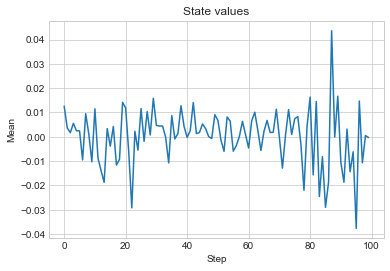

In [6]:
env.render_state_mean_values(n=100)


## 3. Test some random actions and visualize the rewards

### Test some random actions

In [7]:
# test some actions
n=24
rewards = []

print("Actions:")
for _ in range(n):
    action = TradingEnv.ACTIONS[random.randint(0,2)]
    next_state, reward, done = env.step(action)
    rewards.append(reward)
    env.render()


Actions:
sell: vaules rised=False reward=10 done=False
buy: vaules rised=False reward=-10 done=False
hold: vaules rised=True reward=0 done=False
hold: vaules rised=False reward=0 done=False
buy: vaules rised=False reward=-10 done=False
buy: vaules rised=False reward=-10 done=False
buy: vaules rised=True reward=20 done=False
sell: vaules rised=False reward=10 done=False
sell: vaules rised=False reward=10 done=False
hold: vaules rised=True reward=0 done=False
hold: vaules rised=False reward=0 done=False
hold: vaules rised=False reward=0 done=False
buy: vaules rised=False reward=-10 done=False
hold: vaules rised=True reward=0 done=False
sell: vaules rised=False reward=10 done=False
sell: vaules rised=True reward=-10 done=False
hold: vaules rised=False reward=0 done=False
sell: vaules rised=True reward=-10 done=False
sell: vaules rised=True reward=-10 done=False
hold: vaules rised=False reward=0 done=False
sell: vaules rised=False reward=10 done=False
buy: vaules rised=False reward=-10 don

### Visualize the rewards


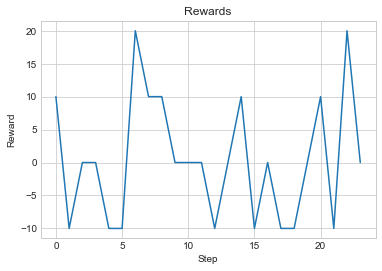

In [8]:
env.plot(range(0,n), rewards, title="Rewards", xlabel="Step", ylabel="Reward")


---
__The end.__

